<a href="https://colab.research.google.com/github/PurraSujay/Computer-Vision-Projects/blob/main/object_detection_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Object Detection Part-2!**

**Canny Edge Detection !**

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
img = cv2.imread('sammy_face.jpg')
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

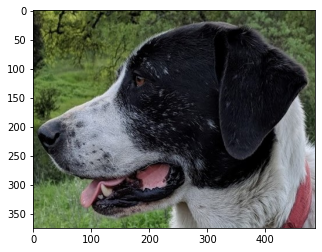

In [7]:
plt.imshow(img)

In [8]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

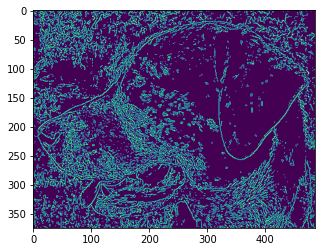

In [9]:
plt.imshow(edges)

In [13]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)

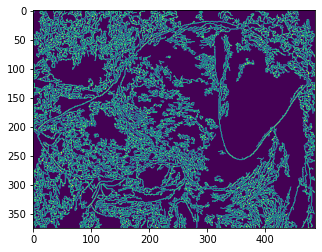

In [14]:
plt.imshow(edges)

In [15]:
# Calculate the median pixel value
med_val = np.median(img) 

In [17]:
med_val

64.0

In [20]:
# Lower bound is either 0 or 70% of the median value, whicever is higher
lower = int(max(0, 0.7* med_val))

# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))

In [27]:
upper, lower

(83, 44)

In [21]:
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)

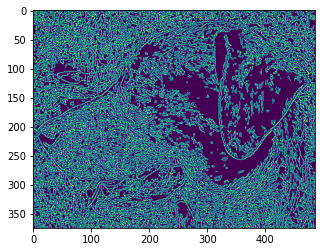

In [22]:
plt.imshow(edges)

**this looks very dirty ...so we can use blur method to get a clear pic !**

In [23]:
blurred_img = cv2.blur(img,ksize=(5,5))

In [24]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)

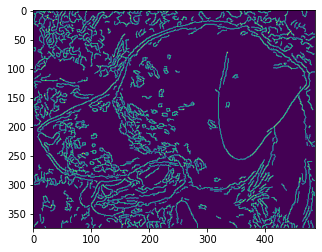

In [25]:
plt.imshow(edges)

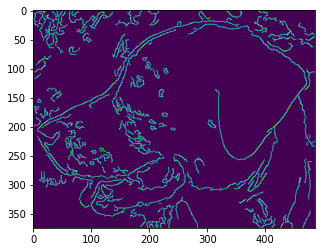

In [26]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper+50)
plt.imshow(edges)

#**Grid Detection**

In [28]:
flat_chess = cv2.imread('flat_chessboard.png')

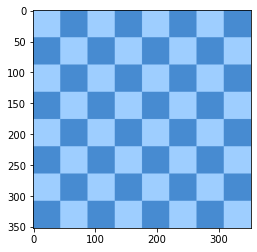

In [29]:
plt.imshow(flat_chess,cmap='gray')

In [30]:
found, corners = cv2.findChessboardCorners(flat_chess,(7,7))

In [31]:
if found:
    print('OpenCV was able to find the corners')
else:
    print("OpenCV did not find corners. Double check your patternSize.")

OpenCV was able to find the corners


In [32]:
corners.shape

(49, 1, 2)

In [34]:

flat_chess_copy = flat_chess.copy()
cv2.drawChessboardCorners(flat_chess_copy, (7, 7), corners, found)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

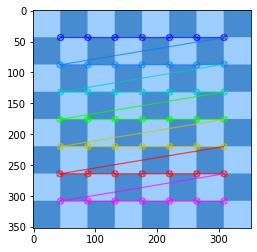

In [35]:
plt.imshow(flat_chess_copy)

circles based Grid

In [36]:
dots = cv2.imread('dot_grid.png')

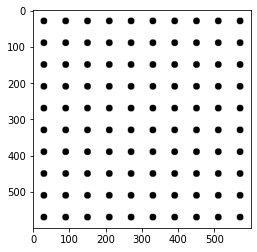

In [37]:
plt.imshow(dots)

In [38]:

found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)

In [39]:
found

True

In [40]:
dbg_image_circles = dots.copy()
cv2.drawChessboardCorners(dbg_image_circles, (10, 10), corners, found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

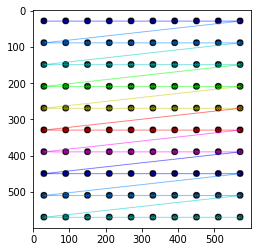

In [41]:
plt.imshow(dbg_image_circles)